In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
data = pd.read_csv(r"C:\Users\Palem\Downloads\Austin-2019-01-01-to-2023-07-22 (1).csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1664 non-null   object 
 1   datetime          1664 non-null   object 
 2   tempmax           1664 non-null   float64
 3   tempmin           1664 non-null   float64
 4   temp              1664 non-null   float64
 5   feelslikemax      1664 non-null   float64
 6   feelslikemin      1664 non-null   float64
 7   feelslike         1664 non-null   float64
 8   dew               1664 non-null   float64
 9   humidity          1664 non-null   float64
 10  precip            1664 non-null   float64
 11  precipprob        1664 non-null   int64  
 12  precipcover       1664 non-null   float64
 13  preciptype        641 non-null    object 
 14  snow              1664 non-null   float64
 15  snowdepth         1664 non-null   float64
 16  windgust          1453 non-null   float64


In [6]:
data.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1023
snow                   0
snowdepth              0
windgust             211
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          1105
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [9]:
data["preciptype"] = data["preciptype"].fillna(data["preciptype"].mode()[0])

In [10]:
data["windgust"] = data["windgust"].fillna(data["windgust"].mode()[0])

In [11]:
data["severerisk"] = data["severerisk"].fillna(data["severerisk"].mode()[0])

In [12]:
data.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [9]:
X = data[['tempmax', 'tempmin', 'humidity', 'dew']]
y = data['precip']

In [10]:
vif = pd.DataFrame()   # create empty dataframe
vif["Feature"] = X.columns     # store feature names
vif["VIF"] = [variance_inflation_factor(X.values, i)
              for i in range(X.shape[1])]
print(vif)


    Feature         VIF
0   tempmax   82.973278
1   tempmin  226.871499
2  humidity   18.017282
3       dew  153.963637


In [11]:
print(X.corr())

           tempmax   tempmin  humidity       dew
tempmax   1.000000  0.884184 -0.129994  0.813444
tempmin   0.884184  1.000000  0.136408  0.929744
humidity -0.129994  0.136408  1.000000  0.430626
dew       0.813444  0.929744  0.430626  1.000000


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.049747708518265
Root Mean Squared Error: 0.2230419434058648
R-squared: 0.16619844427894748


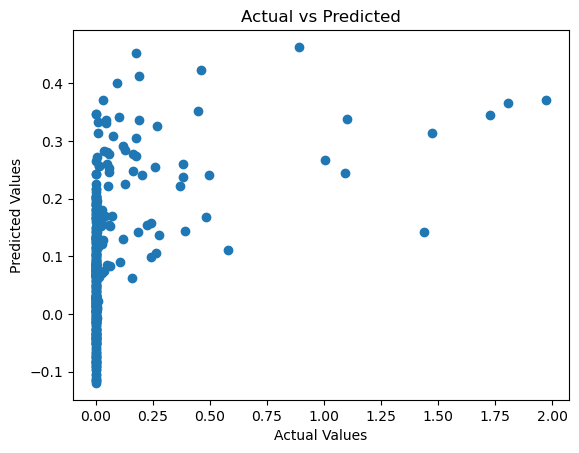

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


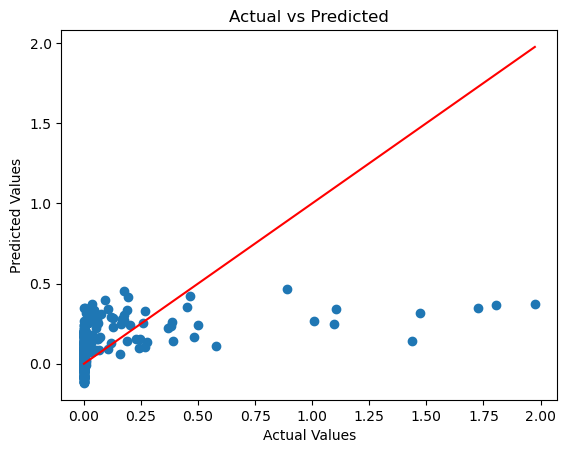

In [21]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')  # perfect prediction line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()